### Introduction
Visualizing the number of COVID-19 cases - ***Confirmed, Deaths, Recovered*** - in Singapore over time.

### Table of Contents
1. [API Call](#cell1)
2. [Data Formatting](#cell2)
3. [Visualization](#cell3)

In [1]:
import json
import requests
import pandas as pd
from datetime import datetime as dt

# visualization 
import plotly.express as px
import matplotlib.pyplot as plt

In [2]:
import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")

#### 1. API Call  <a id="cell1"></a>

In [3]:
API_URL = "https://api.covid19api.com/total/dayone/country/singapore"

##### The API returns all the cases by case type for Singapore from the first recorded case.

In [4]:
response = requests.get(API_URL)
response_dict = json.loads(response.text)

In [5]:
covid19_cases_df = pd.DataFrame(response_dict)

In [6]:
covid19_cases_df.tail(10)

,Country,CountryCode,Province,City,CityCode,Lat,Lon,Confirmed,Deaths,Recovered,Active,Date
663,Singapore,,,,,0,0,241341,612,0,240729,2021-11-16T00:00:00Z
664,Singapore,,,,,0,0,244815,619,0,244196,2021-11-17T00:00:00Z
665,Singapore,,,,,0,0,244815,619,0,244196,2021-11-18T00:00:00Z
666,Singapore,,,,,0,0,248587,641,0,247946,2021-11-19T00:00:00Z
667,Singapore,,,,,0,0,250518,654,0,249864,2021-11-20T00:00:00Z
668,Singapore,,,,,0,0,252188,662,0,251526,2021-11-21T00:00:00Z
669,Singapore,,,,,0,0,253649,667,0,252982,2021-11-22T00:00:00Z
670,Singapore,,,,,0,0,255431,672,0,254759,2021-11-23T00:00:00Z
671,Singapore,,,,,0,0,257510,678,0,256832,2021-11-24T00:00:00Z
672,Singapore,,,,,0,0,258785,681,0,258104,2021-11-25T00:00:00Z


#### 2. Data Formatting <a id="cell2"></a>

##### Keeping the required columns

In [7]:
covid19_cases_df = covid19_cases_df[['Date', 'Confirmed', 'Deaths', 'Recovered']]

##### Formatting timestamp to keep only the date

In [8]:
covid19_cases_df['Date'] = pd.to_datetime(covid19_cases_df['Date'], errors='coerce')
covid19_cases_df['date'] = covid19_cases_df.Date.dt.strftime('%Y-%m-%d')

In [9]:
# Dropping the exsisting Date column with timestamp since it is not required anymore
covid19_cases_df.drop('Date', axis=1, inplace=True)

In [10]:
covid19_cases_df

,Confirmed,Deaths,Recovered,date
0,1,0,0,2020-01-23
1,3,0,0,2020-01-24
2,3,0,0,2020-01-25
3,4,0,0,2020-01-26
4,5,0,0,2020-01-27
...,...,...,...,...
668,252188,662,0,2021-11-21
669,253649,667,0,2021-11-22
670,255431,672,0,2021-11-23
671,257510,678,0,2021-11-24


##### Merging the cases types - **Confirmed, Deaths, Recovered** - into a single column for visualisation 

In [11]:
covid19_cases_df = pd.melt(covid19_cases_df, id_vars=['date'], 
             value_vars=['Confirmed', 'Deaths', 'Recovered'],
             value_name="cases", var_name="case_type")
covid19_cases_df

,date,case_type,cases
0,2020-01-23,Confirmed,1
1,2020-01-24,Confirmed,3
2,2020-01-25,Confirmed,3
3,2020-01-26,Confirmed,4
4,2020-01-27,Confirmed,5
...,...,...,...
2014,2021-11-21,Recovered,0
2015,2021-11-22,Recovered,0
2016,2021-11-23,Recovered,0
2017,2021-11-24,Recovered,0


#### 3. Visualizations  <a id="cell3"></a>

- Using Seaborn

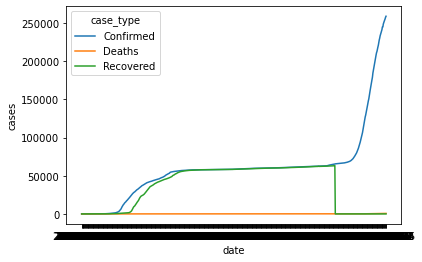

In [12]:
import seaborn as sns
sns.lineplot(data=covid19_cases_df, x="date", y="cases", hue="case_type")
plt.show()

- Using Plotly for the dashboard (better visualizations)

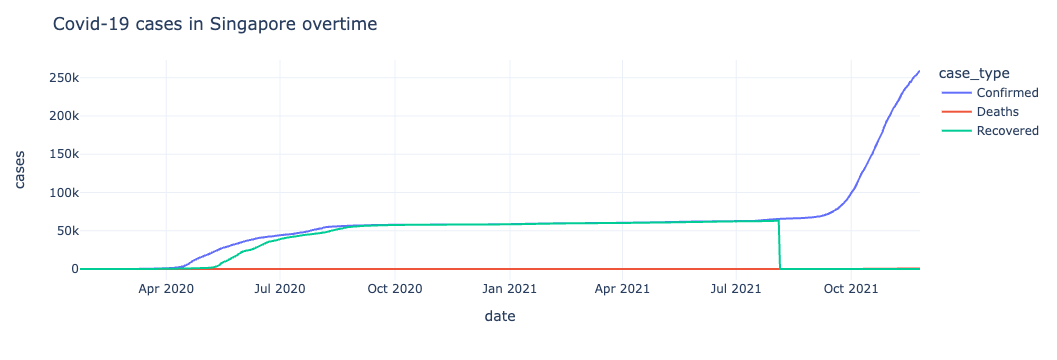

In [14]:
fig = px.line(covid19_cases_df, x="date", y="cases", color='case_type', template='plotly_white')
fig.update_layout(
    title='Covid-19 cases in Singapore overtime',
    font=dict(
        family='Verdana, monospace',
        size=12
    ),
)
fig.show()